# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data

## data download

In [2]:
df_or = pd.read_csv(
    '/Users/georgeshmelin/Desktop/Computing/webeet/week1/school_safety_report2.csv',
    sep=';'
)
df_or.shape

(6310, 34)

In [3]:
df = df_or.copy()
df = df.drop_duplicates()
df.shape

(6309, 34)

In [4]:
df.sample(5)

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
4423,2013-14,X285,09X361,The Highbridge Green School,X361,200 West 167th Street,X,9.0,143,NaN,...,BRONX,10452.0,40.838224,-73.927891,4.0,16.0,193.0,2117349.0,2.025270e+09,Highbridge ...
4563,2013-14,X132,09X132,P.S. 132 Garret A. Morgan,X132,1245 WASHINGTON AVENUE,X,9.0,492,NaN,...,BRONX,10456.0,40.831827,-73.906607,3.0,16.0,145.0,2001619.0,2.023900e+09,Claremont-Bathgate ...
5112,2013-14,Q152,30Q152,P.S. 152 Gwendoline N. Alleyne School,Q152,33-52 62 STREET,Q,30.0,"1,362",NaN,...,QUEENS,11377.0,40.753037,-73.900123,2.0,26.0,293.0,4027102.0,4.011840e+09,Woodside ...
5579,2013-14,M088,03M415,Wadleigh Secondary School for the Performing &...,M415,215 WEST 114 STREET,M,3.0,531,215 WEST 114 STREET CONSOLIDATED LOCATION,...,MANHATTAN,10026.0,40.802207,-73.954142,10.0,9.0,218.0,1055204.0,1.018300e+09,Central Harlem South ...
2248,2014-15,K126,14K126,John Ericsson Middle School 126,K126,424 LEONARD STREET,K,14.0,318,424 LEONARD STREET CONSOLIDATED LOCATION,...,BROOKLYN,11222.0,40.719819,-73.948625,1.0,33.0,499.0,3067788.0,3.027120e+09,Greenpoint ...


## data EDA

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.head()

,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,borough_name,postcode,latitude,longitude,community_board,council_district_,census_tract,bin,bbl,nta
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.0,712,NaN,...,BROOKLYN,11226.0,40.648590,-73.957138,14.0,40.0,794.0,3117230.0,3.051030e+09,Erasmus ...
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.0,231,NaN,...,BROOKLYN,11233.0,40.685695,-73.922463,3.0,41.0,377.0,3039906.0,3.014900e+09,Stuyvesant Heights ...
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.0,450,NaN,...,BROOKLYN,11216.0,40.682663,-73.955338,3.0,36.0,227.0,3057406.0,3.019980e+09,Clinton Hill ...
3,2015-16,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,1378,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2015-16,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,374,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...


In [6]:
df['school_year'] = df['school_year'].astype('category') # in my view in this column easier work as categorical rather than datetime
df['school_year'].nunique()

3

In [7]:
df['building_code'] = df['building_code'].astype('object')
df['building_code'].nunique()

1196

In [8]:
df['dbn'] = df['dbn'].astype('object')
df['dbn'].nunique()

1890

In [9]:
df['location_name'] = df['location_name'].astype('object')
df['location_name'].nunique()

2273

In [10]:
df['location_name'] = df['location_name'].astype('object')
df['location_name'].nunique()

2273

In [11]:
df['location_code'] = df['location_code'].astype('object')
df['location_code'].nunique()

1849

In [12]:
df['address'] = df['address'].astype('object')
df['address'].nunique()

1212

In [13]:
df['borough'] = df['borough'].astype('category')
df['borough'].nunique()

6

In [14]:
df['geographical_district_code'] = df['geographical_district_code'].astype('Int32')
df['geographical_district_code'].unique()

<IntegerArray>
[  17,   16,   13,    8,   15,   21,   23,   24,   19,   10,    7,   12,    9,
   11, <NA>,   31,   26,   27,   30,   29,   28,   25,    6,    2,    5,    4,
    3,    1,    0,   22,   18,   20,   32,   14]
Length: 34, dtype: Int32

In [15]:
# used ChatGPT from VS code to reduce the size of the float
df['geographical_district_code'] = df['geographical_district_code'].astype('category')
df['geographical_district_code'].nunique()

33

In [16]:
df['register'] = df['register'].str.replace(",", "")

In [17]:
df['register'] = df['register'].astype('Int32')
df['register'].nunique()

1630

In [18]:
df['register'].value_counts()

register
496     16
383     15
504     15
255     15
325     14
        ..
4372     1
3220     1
1730     1
3968     1
1297     1
Name: count, Length: 1630, dtype: Int64

In [19]:
df['register'].dropna().sample(10)

1717    182
1777    427
1939    649
180     768
5715    365
3950    510
3143    334
2405    573
5505    425
1312    548
Name: register, dtype: Int32

In [20]:
df['building_name'] = df['building_name'].astype('object')
df['building_name'].nunique()

379

In [21]:
df['number_of_schools'] = df['#_schools'].astype('Int32')
df = df.drop(columns=['#_schools'])
df['number_of_schools'].nunique()

11

In [22]:
df['number_of_schools'].unique()

<IntegerArray>
[1, 3, 4, 2, 5, 7, 8, 6, 11, 10, 9]
Length: 11, dtype: Int32

In [23]:
df['schools_in_building'] = df['schools_in_building'].astype('object')
df['schools_in_building'].nunique()

1369

In [24]:
df['major_n'] = df['major_n'].astype('category')
df['major_n'].nunique()

12

In [25]:
df['oth_n'] = df['oth_n'].astype('category')
df['oth_n'].nunique()

26

In [26]:
df['nocrim_n'] = df['nocrim_n'].astype('category')
df['nocrim_n'].nunique()

55

In [27]:
df['prop_n'] = df['prop_n'].astype('category')
df['prop_n'].nunique()

21

In [28]:
df['vio_n'] = df['vio_n'].astype('category')
df['vio_n'].nunique()

16

In [29]:
df['engroupa'] = df['engroupa'].astype('category')
df['engroupa'].nunique()

12

In [30]:
df['rangea'] = df['rangea'].astype('category')
df['rangea'].nunique()

13

In [31]:
df['avgofmajor_n'].unique()

array([0.28, 0.24, 0.27, 0.38,  nan, 0.64, 0.57, 0.42, 3.14, 1.69, 1.13,
       0.59, 0.9 , 0.33, 0.54, 0.36, 0.31, 0.48, 0.46, 0.89, 1.96, 0.82,
       0.95, 1.57, 3.33, 2.6 , 0.52, 0.86, 0.35, 0.43, 0.56, 2.93, 2.13,
       2.39, 0.81, 1.8 ])

In [32]:
df['avgofmajor_n'] = df['avgofmajor_n'].astype('float32')
df['avgofmajor_n'].nunique()

35

In [33]:
df['avgofoth_n'].unique()

array([ 1.11,  0.71,  0.9 ,  1.71,   nan,  3.02,  2.12,  1.78, 13.  ,
        7.16,  8.47,  2.3 ,  3.5 ,  6.67,  2.15,  0.76,  1.12,  2.19,
        1.65,  3.22,  7.74,  2.97,  3.35,  7.21, 12.  , 10.4 ,  3.26,
        1.32,  1.06,  1.03,  2.4 , 12.33,  9.06,  7.89,  3.95,  5.43,
        7.8 ])

In [34]:
df['avgofoth_n'] = df['avgofoth_n'].astype('float32')
df['avgofoth_n'].nunique()

36

In [35]:
df['avgofnocrim_n'].unique()

array([ 1.74,  1.71,  1.67,  2.38,   nan,  5.77,  3.64,  3.44, 34.86,
       17.44, 15.33,  4.8 ,  7.25,  7.  ,  4.33,  1.38,  1.17,  1.82,
        3.69,  2.77,  5.07, 16.07,  5.58,  6.9 , 14.07, 34.5 , 14.8 ,
        2.49,  5.55,  1.76,  1.09,  1.23,  3.56, 31.53, 14.5 , 13.67,
        6.51,  8.48,  7.6 ])

In [36]:
df['avgofnocrim_n'] = df['avgofnocrim_n'].astype('float32')
df['avgofnocrim_n'].nunique()

38

In [37]:
df['avgofprop_n'].unique()[:10] # limit to first 10 values

array([0.75, 0.51, 0.63, 0.98,  nan, 1.72, 1.39, 1.02, 8.29, 3.63])

In [38]:
df['avgofprop_n'] = df['avgofprop_n'].astype('float32')
df['avgofprop_n'].nunique()

36

In [39]:
df['avgofvio_n'] = df['avgofvio_n'].astype('float32')
df['avgofvio_n'].nunique()

34

In [40]:
df['borough_name'] = df['borough_name'].astype('category')
df['borough_name'].nunique()

5

In [41]:
df['postcode'].unique()

array([11226., 11233., 11216., 10465., 11220., 11201., 11223., 11212.,
       11385., 11207., 10468., 10451., 10460., 10457., 10453., 10467.,
       10462., 10459., 10463., 10455., 10458., 10456., 10461., 10475.,
       10473., 10472., 10469., 10466.,    nan, 10452., 10454., 10464.,
       10471., 10474., 10470., 10301., 10314., 10308., 10309., 10304.,
       10312., 10302., 10306., 10305., 10310., 10303., 10307., 11004.,
       11426., 11101., 11417., 11373., 11109., 11362., 11423., 11102.,
       11435., 11370., 11368., 11366., 11432., 11434., 11375., 11416.,
       11419., 11367., 11411., 11106., 11418., 11691., 11354., 11433.,
       11103., 11427., 11365., 11413., 11364., 11694., 11361., 11369.,
       11104., 11372., 11428., 11421., 11379., 11355., 11414., 11377.,
       11420., 11422., 11357., 11374., 11692., 11412., 11001., 11693.,
       11360., 11378., 11436., 11105., 11356., 11358., 11415., 11363.,
       11429., 10031., 10038., 10030., 10001., 10034., 10027., 10035.,
      

In [42]:
df['postcode'] = df['postcode'].astype('Int32')
df['postcode'] = df['postcode'].astype('object') # it is essential to have such values like POSTCODE as OBJECT, non numeric
df['postcode'].nunique()

173

In [43]:
df['latitude'] = df['latitude'].astype('float32')
df['latitude'].nunique()

1184

In [44]:
df['longitude'] = df['longitude'].astype('float32')
df['longitude'].nunique()

1166

In [45]:
df['community_board'] = df['community_board'].astype('Int32')
df['community_board'] = df['community_board'].astype('category')
df['community_board'].nunique()

18

In [46]:
df['council_district'] = df['council_district_'].astype('Int32')
df['council_district'] = df['council_district'].astype('object')
df['council_district'].nunique()

51

In [47]:
df['census_tract'] = df['census_tract'].astype('Int32')
df['census_tract'] = df['census_tract'].astype('object')
df['census_tract'].nunique()

693

In [48]:
df['bin'] = df['bin'].astype('Int32')
df['bin'] = df['bin'].astype('object')
df['bin'].nunique()

1178

In [49]:
df['bbl'] = df['bbl'].astype('object')
df['bbl'].nunique()

1164

I don't know the exact meaning of - community_board, council_district_, census_tract, bin , bbl therefore these columns leave for the moment as non-numeric

In [50]:
df['nta'] = df['nta'].astype('object')
df['nta'].nunique()

189

In [51]:
df.sample(2)

,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,latitude,longitude,community_board,council_district_,census_tract,bin,bbl,nta,number_of_schools,council_district
4431,2013-14,X234,12X300,The School of Science and Applied Learning,X300,2050 PROSPECT AVENUE,X,12,602,NaN,...,40.846237,-73.887405,6,15.0,371,2012957,2031090001.0,East Tremont ...,1,15
5605,2013-14,M063,01M063,The STAR Academy - P.S.63,M063,121 EAST 3 STREET,M,1,179,121 EAST 3 STREET CONSOLIDATED LOCATION,...,40.724117,-73.986382,3,2.0,32,1005760,1004310014.0,East Village ...,2,2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6309 entries, 0 to 6309
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   school_year                 6309 non-null   category
 1   building_code               6309 non-null   object  
 2   dbn                         5307 non-null   object  
 3   location_name               6309 non-null   object  
 4   location_code               5307 non-null   object  
 5   address                     6307 non-null   object  
 6   borough                     6307 non-null   category
 7   geographical_district_code  6303 non-null   category
 8   register                    6050 non-null   Int32   
 9   building_name               3755 non-null   object  
 10  schools_in_building         6309 non-null   object  
 11  major_n                     3561 non-null   category
 12  oth_n                       3561 non-null   category
 13  nocrim_n               

### 4. Exploring Data

In [53]:
"""
df["school_name"].nunique() - df["school_name"].nunique() non existing column?
df["enrollment"].count()
df["enrollment"].mean()
df.describe()
"""

'\ndf["school_name"].nunique() - df["school_name"].nunique() non existing column?\ndf["enrollment"].count()\ndf["enrollment"].mean()\ndf.describe()\n'

In [54]:
df = df.drop_duplicates()
df.shape

(6309, 35)

# The Task

## task day2

In [55]:
df["borough"].value_counts()

borough
K    2047
X    1558
M    1253
Q    1189
R     255
O       5
Name: count, dtype: int64

In [56]:
df[df["borough"] == "K"]

,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,latitude,longitude,community_board,council_district_,census_tract,bin,bbl,nta,number_of_schools,council_district
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17,712,NaN,...,40.648590,-73.957138,14,40.0,794,3117230,3051030079.0,Erasmus ...,1,40
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16,231,NaN,...,40.685696,-73.922462,3,41.0,377,3039906,3014900001.0,Stuyvesant Heights ...,1,41
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13,450,NaN,...,40.682663,-73.955338,3,36.0,227,3057406,3019980001.0,Clinton Hill ...,1,36
3,2015-16,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17,1378,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,40.656181,-73.951584,9,40.0,802,3378201,3050500051.0,Prospect Lefferts Gardens-Wingate ...,3,40
4,2015-16,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17,374,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,40.656181,-73.951584,9,40.0,802,3378201,3050500051.0,Prospect Lefferts Gardens-Wingate ...,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,2013-14,K055,23K493,Brooklyn Collegiate: A College Board School,K493,2021 BERGEN STREET,K,23,387,2021 BERGEN STREET CONSOLIDATED LOCATION,...,40.674103,-73.913277,16,41.0,36501,3038939,3014480001.0,Ocean Hill ...,2,41
6306,2013-14,K054,13K054,P.S. 054 Samuel C. Barnes,K054,195 SANFORD STREET,K,13,251,NaN,...,40.693020,-73.953033,3,33.0,241,3049020,3017650015.0,Bedford ...,1,33
6307,2013-14,K052,22K052,P.S. 052 Sheepshead Bay,K052,2675 EAST 29 STREET,K,22,789,NaN,...,40.587921,-73.940529,15,48.0,600,3205435,3074740001.0,Sheepshead Bay-Gerritsen Beach-Manhattan Beach...,1,48
6308,2013-14,K051,15K051,M.S. 51 William Alexander,K051,350 5 AVENUE,K,15,1116,NaN,...,40.672016,-73.983948,6,39.0,135,3021057,3009810111.0,Park Slope-Gowanus ...,1,39


In [57]:
df[(df["register"] > 1000) & (df["borough"] == "K")]

,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,latitude,longitude,community_board,council_district_,census_tract,bin,bbl,nta,number_of_schools,council_district
3,2015-16,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17,1378,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,40.656181,-73.951584,9,40.0,802,3378201,3050500051.0,Prospect Lefferts Gardens-Wingate ...,3,40
8,2015-16,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15,1280,NaN,...,40.649040,-74.012291,7,38.0,80,3011821,3007550022.0,Sunset Park West ...,1,38
1427,2015-16,K845,NaN,330 18 STREET CONSOLIDATED LOCATION,NaN,330 18 STREET,K,15,1030,330 18 STREET CONSOLIDATED LOCATION,...,40.660976,-73.988297,7,38.0,147,3331274,3008800001.0,Sunset Park West ...,2,38
1440,2015-16,K805,NaN,49 FLATBUSH AVENUE EXTENSION CONSOLIDATED LOCA...,NaN,49 FLATBUSH AVENUE EXTENSION,K,13,1244,49 FLATBUSH AVENUE EXTENSION CONSOLIDATED LOCA...,...,40.697338,-73.985016,2,33.0,15,3000216,3001200020.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,3,33
1452,2015-16,K655,NaN,345 DEAN STREET CONSOLIDATED LOCATION,NaN,345 DEAN STREET,K,15,1449,345 DEAN STREET CONSOLIDATED LOCATION,...,40.683559,-73.980270,2,33.0,39,3001190,3001920013.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,2013-14,K088,NaN,544 7TH AVENUE CONSOLIDATED LOCATION,NaN,544 7TH AVENUE,K,15,1609,544 7TH AVENUE CONSOLIDATED LOCATION,...,40.660023,-73.987640,7,38.0,147,3331276,3008800001.0,Sunset Park West ...,2,38
6261,2013-14,K088,15K088,J.H.S. 088 Peter Rouget,K088,544 7TH AVENUE,K,15,1206,544 7TH AVENUE CONSOLIDATED LOCATION,...,40.660023,-73.987640,7,38.0,147,3331276,3008800001.0,Sunset Park West ...,2,38
6285,2013-14,K062,20K062,J.H.S. 062 Ditmas,K062,700 CORTELYOU ROAD,K,20,1297,NaN,...,40.638687,-73.971649,12,40.0,490,3126842,3053910001.0,Kensington-Ocean Parkway ...,1,40
6294,2013-14,K104,20K104,P.S./I.S. 104 The Fort Hamilton School,K104,9115 5 AVENUE,K,20,1181,NaN,...,40.618416,-74.028839,10,43.0,160,3154775,3060880001.0,Bay Ridge ...,1,43


In [58]:
df.describe()

,register,avgofmajor_n,avgofoth_n,avgofnocrim_n,avgofprop_n,avgofvio_n,latitude,longitude,council_district_,number_of_schools
count,6050.0,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,6285.000000,6285.000000,6285.000000,6309.0
mean,674.092562,0.500808,1.939792,3.284559,1.256738,0.888413,40.736629,-73.920204,24.413524,2.276906
std,553.529835,0.417370,1.762414,4.085349,1.066772,0.805516,0.085326,0.077558,14.526673,1.604095
min,3.0,0.240000,0.710000,1.090000,0.510000,0.320000,40.508286,-74.244118,1.000000,1.0
25%,336.0,0.310000,1.110000,1.710000,0.750000,0.500000,40.673073,-73.961479,12.000000,1.0
50%,522.5,0.350000,1.320000,1.820000,0.830000,0.590000,40.726768,-73.922264,23.000000,2.0
75%,827.0,0.520000,2.120000,3.560000,1.290000,1.000000,40.818233,-73.881775,37.000000,3.0
max,5534.0,3.330000,13.000000,34.860001,9.200000,7.170000,40.903553,-73.707420,51.000000,11.0


In [59]:
df.groupby("borough")["register"].agg(["count", "mean", "nunique"])

/var/folders/tc/j3328fdx0g5254lv79p9t1bc0000gn/T/ipykernel_1196/3254780910.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("borough")["register"].agg(["count", "mean", "nunique"])


,count,mean,nunique
borough,,,
K,1923,625.371815,944
M,1199,576.703086,732
O,5,346.0,5
Q,1171,855.605465,808
R,249,883.064257,219
X,1501,639.103264,862


In [60]:
df.iloc[10]

school_year                                                             2015-16
building_code                                                              K095
dbn                                                                      21K095
location_name                                            P.S. 095 The Gravesend
location_code                                                              K095
address                                                  345 VAN SICKLEN STREET
borough                                                                       K
geographical_district_code                                                   21
register                                                                    932
building_name                                                               NaN
schools_in_building                                      P.S. 095 The Gravesend
major_n                                                                     0.0
oth_n                                   

In [61]:
df.loc[df["borough"] == "K"]

,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,latitude,longitude,community_board,council_district_,census_tract,bin,bbl,nta,number_of_schools,council_district
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17,712,NaN,...,40.648590,-73.957138,14,40.0,794,3117230,3051030079.0,Erasmus ...,1,40
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16,231,NaN,...,40.685696,-73.922462,3,41.0,377,3039906,3014900001.0,Stuyvesant Heights ...,1,41
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13,450,NaN,...,40.682663,-73.955338,3,36.0,227,3057406,3019980001.0,Clinton Hill ...,1,36
3,2015-16,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17,1378,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,40.656181,-73.951584,9,40.0,802,3378201,3050500051.0,Prospect Lefferts Gardens-Wingate ...,3,40
4,2015-16,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17,374,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,40.656181,-73.951584,9,40.0,802,3378201,3050500051.0,Prospect Lefferts Gardens-Wingate ...,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,2013-14,K055,23K493,Brooklyn Collegiate: A College Board School,K493,2021 BERGEN STREET,K,23,387,2021 BERGEN STREET CONSOLIDATED LOCATION,...,40.674103,-73.913277,16,41.0,36501,3038939,3014480001.0,Ocean Hill ...,2,41
6306,2013-14,K054,13K054,P.S. 054 Samuel C. Barnes,K054,195 SANFORD STREET,K,13,251,NaN,...,40.693020,-73.953033,3,33.0,241,3049020,3017650015.0,Bedford ...,1,33
6307,2013-14,K052,22K052,P.S. 052 Sheepshead Bay,K052,2675 EAST 29 STREET,K,22,789,NaN,...,40.587921,-73.940529,15,48.0,600,3205435,3074740001.0,Sheepshead Bay-Gerritsen Beach-Manhattan Beach...,1,48
6308,2013-14,K051,15K051,M.S. 51 William Alexander,K051,350 5 AVENUE,K,15,1116,NaN,...,40.672016,-73.983948,6,39.0,135,3021057,3009810111.0,Park Slope-Gowanus ...,1,39


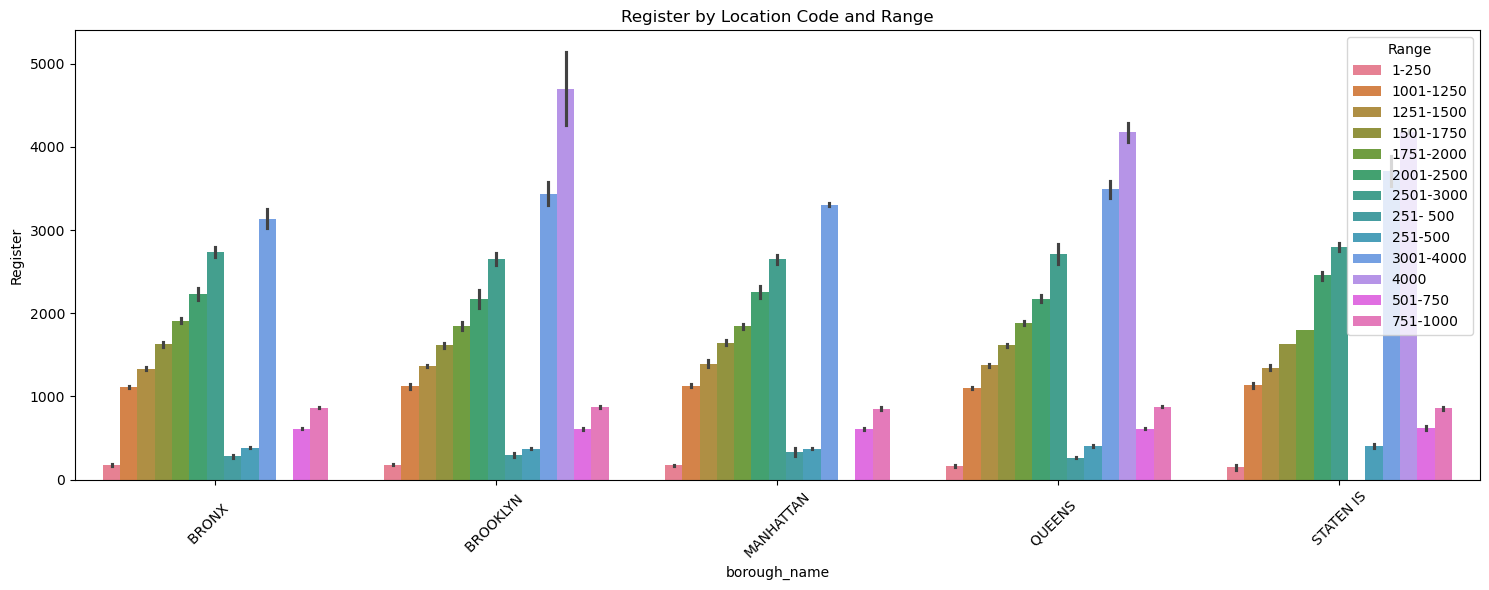

In [62]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=df,
    x="borough_name",
    y="register",
    hue="rangea",
    dodge=True
)
plt.xticks(rotation=45)
plt.title("Register by Location Code and Range")
plt.xlabel("borough_name")
plt.ylabel("Register")
plt.legend(title="Range")
plt.tight_layout()
plt.show()

In [65]:
df.to_csv('/Users/georgeshmelin/Desktop/Computing/webeet/week1/df_cleaned.csv', index=False)

In [63]:
# brooklyn_schools.to_csv("brooklyn_schools.csv", index=False)